In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../course_notebooks/DATA/CIA_Country_Facts.csv')
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.isnull().sum().sort_values(ascending=False)

Climate                               22
Literacy (%)                          18
Industry                              16
Service                               15
Agriculture                           15
Deathrate                              4
Phones (per 1000)                      4
Infant mortality (per 1000 births)     3
Net migration                          3
Birthrate                              3
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
GDP ($ per capita)                     1
Region                                 0
Coastline (coast/area ratio)           0
Pop. Density (per sq. mi.)             0
Area (sq. mi.)                         0
Population                             0
Country                                0
dtype: int64

In [5]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [6]:
# REMOVAL OF TINY ISLANDS
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [7]:
df.isnull().sum().sort_values(ascending=False)

Climate                               18
Literacy (%)                          13
Phones (per 1000)                      2
Deathrate                              2
Industry                               1
Birthrate                              1
Other (%)                              1
Crops (%)                              1
Arable (%)                             1
Service                                1
Infant mortality (per 1000 births)     1
Net migration                          1
Region                                 0
GDP ($ per capita)                     0
Coastline (coast/area ratio)           0
Pop. Density (per sq. mi.)             0
Area (sq. mi.)                         0
Agriculture                            0
Population                             0
Country                                0
dtype: int64

In [8]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))
df.isnull().sum().sort_values(ascending=False)

Literacy (%)                          13
Phones (per 1000)                      2
Deathrate                              2
Industry                               1
Birthrate                              1
Other (%)                              1
Crops (%)                              1
Arable (%)                             1
Service                                1
Infant mortality (per 1000 births)     1
Net migration                          1
GDP ($ per capita)                     0
Region                                 0
Coastline (coast/area ratio)           0
Climate                                0
Pop. Density (per sq. mi.)             0
Area (sq. mi.)                         0
Agriculture                            0
Population                             0
Country                                0
dtype: int64

In [9]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


In [10]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [11]:
df.isnull().sum().sort_values(ascending=False)

Phones (per 1000)                     2
Deathrate                             2
Arable (%)                            1
Industry                              1
Birthrate                             1
Other (%)                             1
Crops (%)                             1
Service                               1
Infant mortality (per 1000 births)    1
Net migration                         1
GDP ($ per capita)                    0
Literacy (%)                          0
Region                                0
Coastline (coast/area ratio)          0
Climate                               0
Pop. Density (per sq. mi.)            0
Area (sq. mi.)                        0
Agriculture                           0
Population                            0
Country                               0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
x = df.drop("Country",axis=1)
x = pd.get_dummies(x)
x.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

Text(0, 0.5, 'Sum of squared distances')

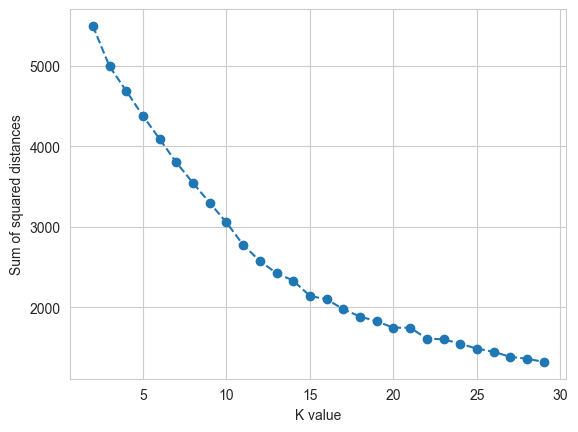

In [15]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    ssd.append(model.inertia_)
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K value")
plt.ylabel("Sum of squared distances")

<AxesSubplot:>

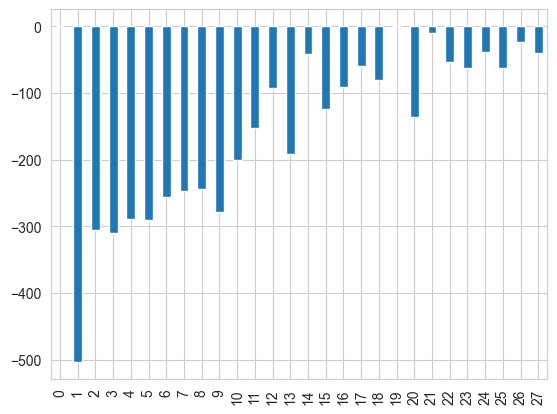

In [16]:
pd.Series(ssd).diff().plot(kind='bar')

In [17]:
model = KMeans(n_clusters=3)
model.fit(scaled_x)
x['K=3 Clusters'] = model.labels_
x.corr()['K=3 Clusters'].sort_values()


Birthrate                                    -0.814140
Infant mortality (per 1000 births)           -0.783414
Region_SUB-SAHARAN AFRICA                    -0.676873
Agriculture                                  -0.611027
Deathrate                                    -0.424422
Other (%)                                    -0.098443
Population                                   -0.056379
Region_ASIA (EX. NEAR EAST)                  -0.045263
Crops (%)                                    -0.031702
Industry                                     -0.019092
Region_NEAR EAST                             -0.015409
Area (sq. mi.)                               -0.005476
Region_NORTHERN AFRICA                        0.006554
Region_OCEANIA                                0.012375
Region_LATIN AMER. & CARIB                    0.019837
Region_C.W. OF IND. STATES                    0.067110
Coastline (coast/area ratio)                  0.078045
Region_NORTHERN AMERICA                       0.137882
Net migrat

In [18]:
iso_codes = pd.read_csv('../course_notebooks/DATA/country_iso_codes.csv')
iso_codes.head()


,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [19]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_mapping


{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [20]:
df['ISO Code'] = df['Country'].map(iso_mapping)
df['Cluster'] = model.labels_

In [22]:
!pip install plotly

You should consider upgrading via the 'F:\Dev\python\course\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [24]:
import plotly.express as px
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster",
                    hover_name="Country")# column to add to hover information
fig.show()
